# Case2: Hastane Randevu Veri Seti

**AIDefenders** <br>
Kübra KARABULUT, Abdulkadir SADİ

## 1. Giriş ve Veri Yükleme

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

* Gerekli Kütüphaneleri Import Ettik.

In [7]:
df = pd.read_csv('hospital_appointment_data.csv') # Veri setini okuduk.

## 2. Veri Keşfi ve Ön İşleme

**Veri Setine İlk Bakış**

In [8]:
df.head() # Veri Setindeki İlk 5 Satırı Görüntüledik.

,AppointmentID,PatientID,AppointmentDate,AppointmentTime,AppointmentDay,PatientAge,PatientGender,Disease,DoctorID,PreviousNoShow,SMSReminder,NoShow
0,1,1102,2023-01-01,15:00:00,Sunday,78,Male,Pediatrics,110,3,Yes,Yes
1,2,1435,2023-01-02,11:00:00,Monday,33,Male,General,152,3,Yes,No
2,3,1860,2023-01-03,09:00:00,Tuesday,35,Male,Orthopedics,145,0,Yes,Yes
3,4,1270,2023-01-04,09:00:00,Wednesday,5,Female,Cardiology,129,1,Yes,No
4,5,1106,2023-01-05,17:30:00,Thursday,38,Female,Pediatrics,156,0,Yes,Yes


In [9]:
df.tail() # Veri Setindeki Son 5 Satırı Görüntüledik.

,AppointmentID,PatientID,AppointmentDate,AppointmentTime,AppointmentDay,PatientAge,PatientGender,Disease,DoctorID,PreviousNoShow,SMSReminder,NoShow
995,996,1009,2025-09-22,13:00:00,Monday,29,Female,Orthopedics,121,1,No,Yes
996,997,1823,2025-09-23,10:30:00,Tuesday,23,Male,Neurology,110,4,Yes,No
997,998,1797,2025-09-24,09:30:00,Wednesday,29,Female,Cardiology,176,2,No,No
998,999,1241,2025-09-25,10:30:00,Thursday,85,Female,General,102,0,No,No
999,1000,1250,2025-09-26,09:30:00,Friday,91,Male,Orthopedics,108,1,Yes,Yes


In [10]:
df.shape # Veri Setinde Bulunan Satır ve Sütun Sayılarını Görüntüledik.

(1000, 12)

* Verimiz 12 değişken "Sütun" ve 1000 randevu bilgisi "Satır" içermektedir.

**AppointmentID:** Her randevu için benzersiz bir kimlik numarası.<br>
**PatientID:** Her hasta için benzersiz bir kimlik numarası.<br>
**AppointmentDate:** Randevu tarihini gösteren tarih sütunu.<br>
**AppointmentTime:** Randevu zamanını gösteren saat sütunu.<br>
**AppointmentDay:** Randevu gününü gösteren sütun.<br>
**PatientAge:** Hastanın yaşı.<br>
**PatientGender:** Hastanın cinsiyeti.<br>
**Disease:** Hastanın hastalık alanı/uzmanlığı.<br>
**DoctorID:** Her doktor için benzersiz bir kimlik numarası.<br>
**PreviousNoShow:** Hastanın daha önceki randevularına gitmeme sayısı.<br>
**SMSReminder:** Hastaya randevu hatırlatıcı mesajı gönderilip gönderilmediği.<br>
**NoShow:** Hastanın randevuya gidip gitmediği (gitmemişse 'Yes', gitmiş ise 'No').

In [11]:
df.describe() # Veri Setindeki Sayısal Değişkenlerin İncelenmesi.

,AppointmentID,PatientID,PatientAge,DoctorID,PreviousNoShow
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1503.929000,47.305000,150.206000,2.047000
std,288.819436,289.998108,29.217591,28.720279,1.400983
min,1.000000,1000.000000,0.000000,100.000000,0.000000
25%,250.750000,1242.750000,21.000000,124.750000,1.000000
50%,500.500000,1505.000000,45.500000,152.500000,2.000000
75%,750.250000,1757.250000,73.000000,175.000000,3.000000
max,1000.000000,1998.000000,99.000000,199.000000,4.000000


* Count İle NaN Olmayan Veri Sayılarını Görüntüledik. Çıktıdan Eksik Veri Olmadığını Görebiliyoruz.
* Mean İle Her Sütundaki Verilerin Aritmetik Ortalamasını Görüntüledik.
* Std İle Her Sütundaki Verilerin Standart Sapmasını Görüntüledik.
* Min İle Her Sütundaki En Düşük Veriyi Görüntüledik.
* 25% İle Verilerin %25'inin Bu Değerin Altında Olduğunu Görüntüledik.(50% ve 75% de aynı mantıkta çalışır.)
* Max İle Her Sütundaki En Yüksek Veriyi Görüntüledik.

Hastaların yaş ortalaması: **47** <br>
En yaşlı hastanın yaşı: **99** <br>
En genç hastanın yaşı: **0**

**Eksik Veri Kontrolü**

In [12]:
df.isnull().sum() # Yukarıdan Anlamış Olsak da Eksik Veri Olmadığını Daha Net Göstermiş Olduk.

AppointmentID      0
PatientID          0
AppointmentDate    0
AppointmentTime    0
AppointmentDay     0
PatientAge         0
PatientGender      0
Disease            0
DoctorID           0
PreviousNoShow     0
SMSReminder        0
NoShow             0
dtype: int64

**Veri Türlerinin Kontrolü**

In [13]:
df.dtypes # Sütunların Hangi Türden Verileri Barındırdığını Gördük.

AppointmentID       int64
PatientID           int64
AppointmentDate    object
AppointmentTime    object
AppointmentDay     object
PatientAge          int64
PatientGender      object
Disease            object
DoctorID            int64
PreviousNoShow      int64
SMSReminder        object
NoShow             object
dtype: object

**Kategorik Değişkenlerin Kodlanması**

In [14]:
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate'])
# Tarih Sütununu Datetime Formatına Dönüştürdük.

In [15]:
df['Year'] = df['AppointmentDate'].dt.year
df['Month'] = df['AppointmentDate'].dt.month
df['Day'] = df['AppointmentDate'].dt.day
# Tarihten Yıl, Ay ve Gün Kısımlarını Çektik.

In [16]:
# Tarih Sütununu Ayırdıktan Sonra Tekrardan Bir Tarih Sütununa Gerek Olmadığı İçin Sildik. inplace=True İfadesiyle Bunu Kalıcı Hale Getirdik.
df.drop('AppointmentDate', axis=1, inplace=True)

In [17]:
# Saat Verilerini Datetime Formatına Dönüştürdük.
df['AppointmentTime'] = pd.to_datetime(df['AppointmentTime'], format='%H:%M:%S')
df['AppointmentTime'] = df['AppointmentTime'].dt.hour + df['AppointmentTime'].dt.minute/60

In [18]:
df # Güncel Tabloyu Görüntüledik.

,AppointmentID,PatientID,AppointmentTime,AppointmentDay,PatientAge,PatientGender,Disease,DoctorID,PreviousNoShow,SMSReminder,NoShow,Year,Month,Day
0,1,1102,15.0,Sunday,78,Male,Pediatrics,110,3,Yes,Yes,2023,1,1
1,2,1435,11.0,Monday,33,Male,General,152,3,Yes,No,2023,1,2
2,3,1860,9.0,Tuesday,35,Male,Orthopedics,145,0,Yes,Yes,2023,1,3
3,4,1270,9.0,Wednesday,5,Female,Cardiology,129,1,Yes,No,2023,1,4
4,5,1106,17.5,Thursday,38,Female,Pediatrics,156,0,Yes,Yes,2023,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1009,13.0,Monday,29,Female,Orthopedics,121,1,No,Yes,2025,9,22
996,997,1823,10.5,Tuesday,23,Male,Neurology,110,4,Yes,No,2025,9,23
997,998,1797,9.5,Wednesday,29,Female,Cardiology,176,2,No,No,2025,9,24
998,999,1241,10.5,Thursday,85,Female,General,102,0,No,No,2025,9,25


## 3. Veri Görselleştirme


### Hastane Randevu Dağılımı

In [19]:
# Aylık Randevu Sayısını Hesaplama
monthly_appointments = df.groupby(['Year', 'Month']).size().reset_index(name='Appointments')
# Veri Setini 'Year' ve 'Month' Sütunlarına Göre Gruplandırdık.
# Gruplandırılmış Verilerin Boyutunu Hesapladık ve Sonuçları Yeni Bir Veri Seti Olarak Döndürdük.
# size() Metodu İle Her Grubun Boyutunu Hesapladık.
# reset_index() Metodu İle Gruplanmış İndeksleri Sıfırladık ve Bunları Sütun Olarak Ekledik.
# 'name' Parametresi İle Yeni Sütunun Adını 'Appointments' Olarak Oluşturduk.

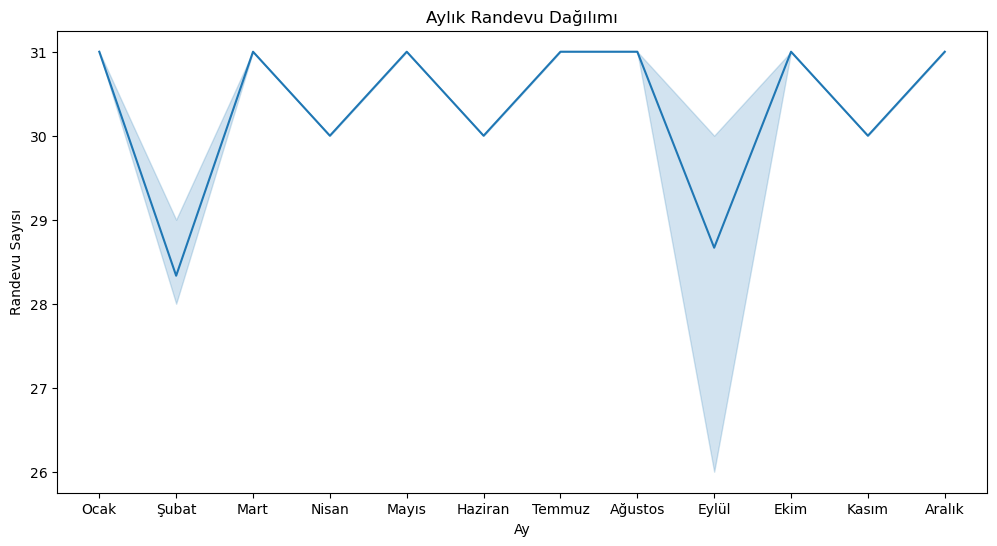

In [20]:
# Aylık Randevu Dağılımını Gösteren Çizgi Grafiği
plt.figure(figsize=(12, 6)) # Grafiğin Boyutunu 8x6 İnç Olarak Ayarladık.
sns.lineplot(x=monthly_appointments['Month'], y=monthly_appointments['Appointments'])
# Aylık Randevu Sayısının Çizgi Grafiğini Oluşturduk. X Eksenini 'Month', Y Eksenini 'Appointments' Olarak Belirledik.
plt.title('Aylık Randevu Dağılımı') # Grafiğe Başlık Ekledik.
plt.xlabel('Ay') # X Eksenini Ay Olarak Gösterdik.
plt.ylabel('Randevu Sayısı') # Y Eksenini Randevu Sayısı Olarak Gösterdik.

# X Ekseni İçin Ayları İsimlendiren Etiketler Ekledik.
plt.xticks(range(1, 13), ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran',
                         'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık'])
plt.show() # Grafiği Gösterdik.

* Çıkan grafikte görüldüğü üzere, rendevu sayıları yılın bazı aylarında daha yüksek, bazı aylarında daha düşük seyretmekte. 
* En yüksek rendevu sayısı Eylül ayında görülüyor.
* En düşük rendevu sayısı ise Mayıs ayında görülüyor. 

In [21]:
# Yıllık Randevu Sayısını Hesapladık.
yearly_appointments = df.groupby('Year').size().reset_index(name='Appointments')
# Veri Setini 'Year' Sütununa Göre Gruplandırdık.
# Gruplandırılmış Verinin Boyutunu Hesapladık ve Sonuçları Yeni Bir Veri Seti Olarak Döndürdük.
# size() Metodu İle Her Grubun Boyutunu Hesapladık.
# reset_index() Metodu İle Gruplanmış İndeksleri Sıfırladık ve Bunları Sütun Olarak Ekledik.
# 'name' Parametresi İle Yeni Sütunun Adını 'Appointments' Olarak Oluşturduk.

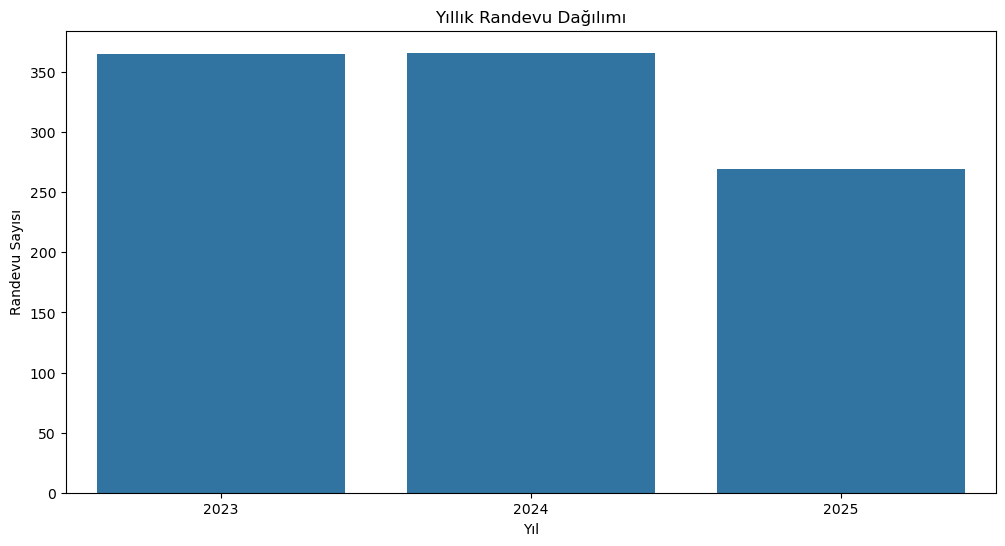

In [22]:
# Yıllık randevu dağılımını gösteren çubuk grafiği
plt.figure(figsize=(12, 6)) # Grafiğin Boyutunu 12x6 İnç Olarak Ayarladık.
sns.barplot(x='Year', y='Appointments', data=yearly_appointments) # Yıllık Randevu Sayısının Çubuk Grafiğini Oluşturduk. X Eksenini 'Year', Y Eksenini 'Appointments' Olarak Belirledik.
plt.title('Yıllık Randevu Dağılımı') # Grafiğe Başlık Ekledik.
plt.xlabel('Yıl') # X Eksenini Yıl Olarak Gösterdik.
plt.ylabel('Randevu Sayısı') # Y Eksenini Randevu Sayısı Olarak Gösterdik.
plt.show() # Grafiği Gösterdik.

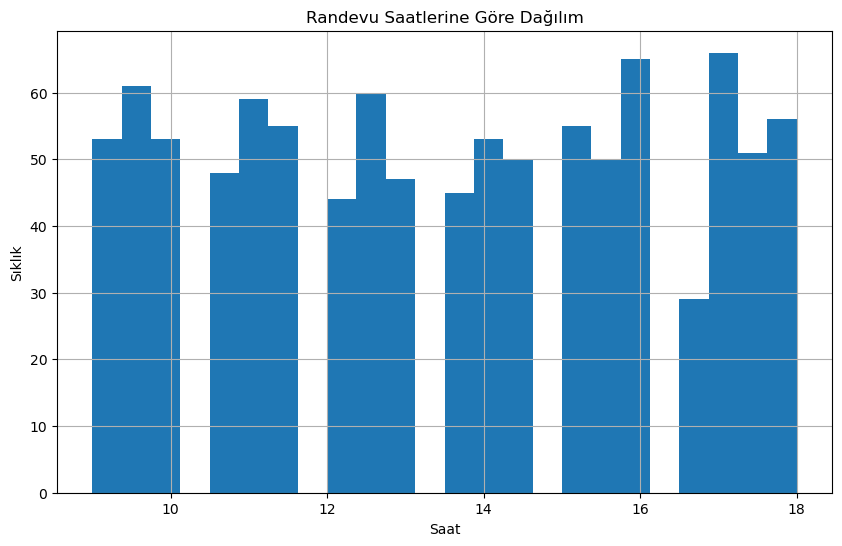

In [23]:
plt.figure(figsize=(10, 6)) # Grafiğin Boyutunu 10x6 İnç Olarak Ayarladık.
df['AppointmentTime'].hist(bins=24) # Randevu Saatlerinin Histogramını 24 Çubuk İle Çizdik.
plt.title('Randevu Saatlerine Göre Dağılım') # Grafiğe Başlık Ekledik.
plt.xlabel('Saat') # X Eksenini Saat Olarak Gösterdik.
plt.ylabel('Sıklık') # Y Eksenini Sıklık Olarak Gösterdik.
plt.show() # Grafiği Gösterdik.

Çıkan grafikte randevuların gün içindeki dağılımını gösteriyor. 
* En yoğun saatler 16:00 civarı ve 14:00'de görülüyor.
* Sabah ve akşam saatleri daha düşük randevu sayılarına mevcut.

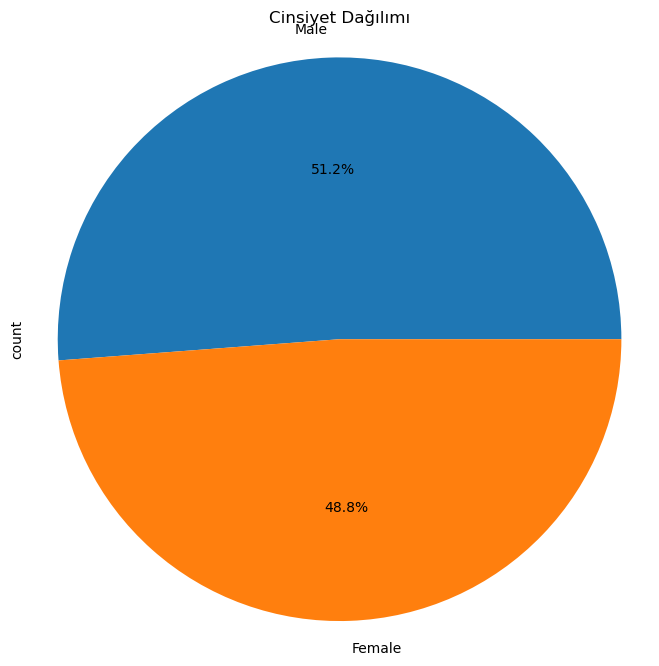

In [24]:
plt.figure(figsize=(8, 8)) # Grafiğin Boyutunu 8x8 İnç Olarak Ayarladık.
df['PatientGender'].value_counts().plot(kind='pie', autopct='%1.1f%%') # Cinsiyet Dağılımını Pie Grafiğiyle Gösterdik.
plt.title('Cinsiyet Dağılımı')  # Grafiğe Başlık Ekledik.
plt.axis('equal') # Grafiğin Boyutunu Yuvarlak Olarak Ayarladık.
plt.show() # Grafiği Gösterdik.

* Cinsiyet dağılımda büyük bir fark gözükmemekte.

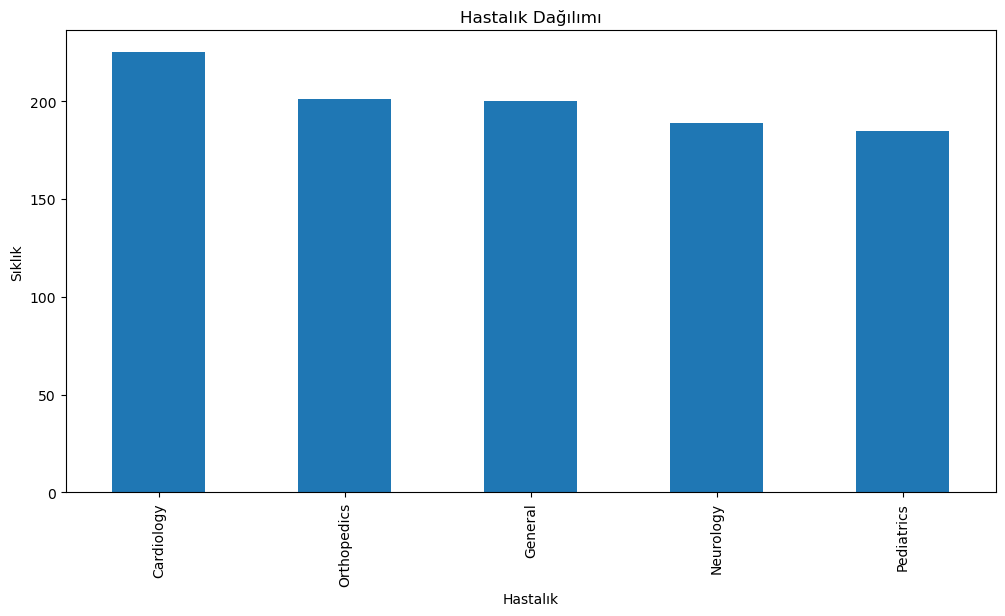

In [25]:
plt.figure(figsize=(12, 6)) # Grafiğin Boyutunu 12x6 İnç Olarak Ayarladık.
df['Disease'].value_counts().plot(kind='bar') # Hastalık Dağılımını Bar Grafiğiyle Gösterdik.
plt.title('Hastalık Dağılımı') # Grafiğe Başlık Ekledik.
plt.xlabel('Hastalık') # X Eksenini Hastalık Olarak Gösterdik.
plt.ylabel('Sıklık') # Y Eksenini Sıklık Olarak Gösterdik.
plt.xticks(rotation=90) # X Ekseninin Etiketlerini Yatay Olarak Gösterdik.
plt.show() # Grafiği Gösterdik.

Grafiğimiz hastalık dağılımının hastanede tedavi edilen hastaların hastalık kategorilerine göre dağılımını gösteriyor.
* Grafikten görüldüğü üzere, en yüksek sayı "Kardiyoloji" kategorisinde yer alıyor. Bu, kardiyoloji alanındaki hastaların diğer hastalık kategorilerine göre daha yüksek olduğunu gösteriyor.

### No-Show Oranı

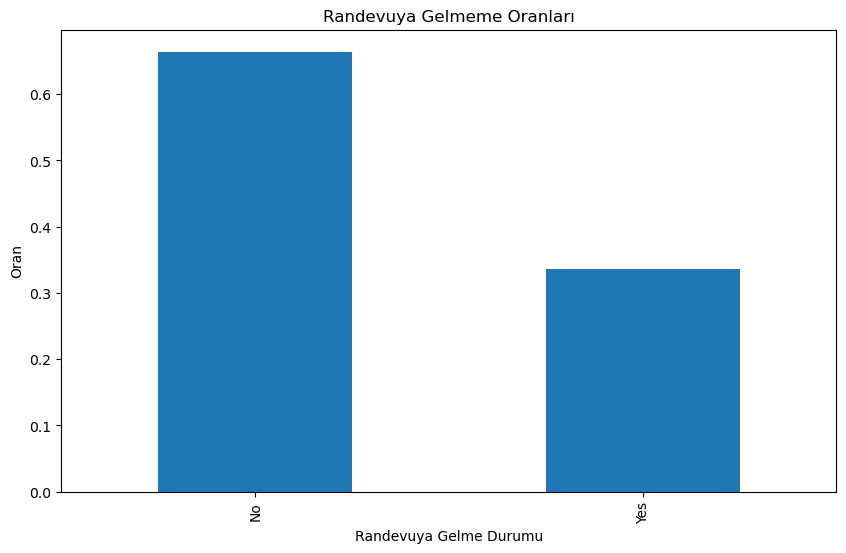

In [26]:
plt.figure(figsize=(10, 6)) # Grafiğin Boyutunu 10x6 İnç Olarak Ayarladık.
df['NoShow'].value_counts(normalize=True).plot(kind='bar') # No-Show Oranlarını Bar Grafiğiyle Gösterdik.
plt.title('Randevuya Gelmeme Oranları') # Grafiğe Başlık Ekledik.
plt.xlabel('Randevuya Gelme Durumu') # X Eksenini Randevuya Gelme Durumu Olarak Gösterdik.
plt.ylabel('Oran') # Y Eksenini Oran Olarak Gösterdik.
plt.show() # Grafiği Gösterdik.

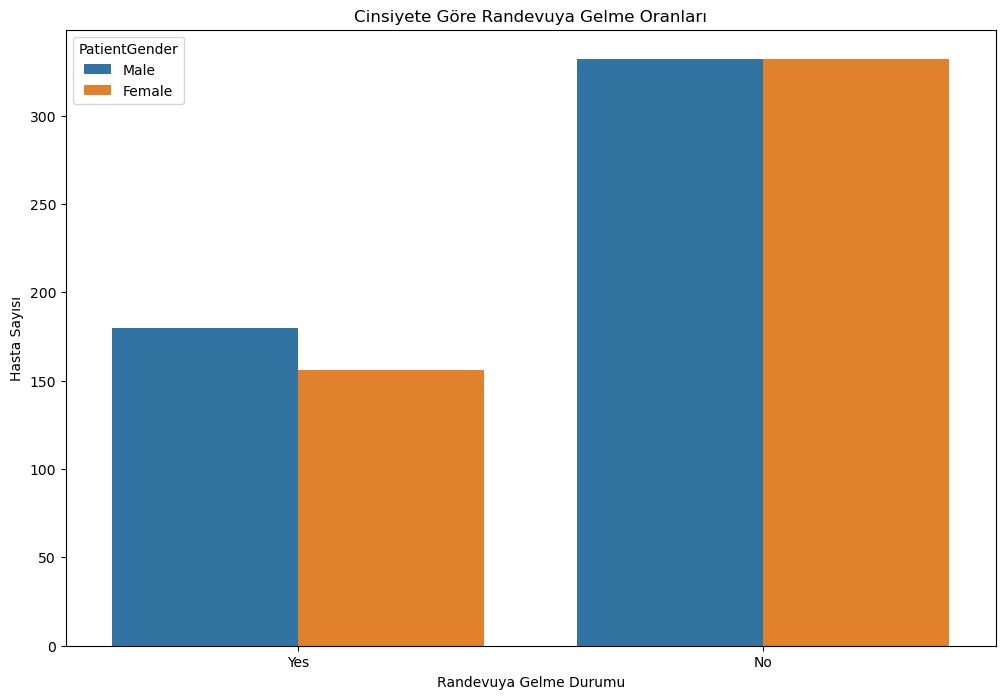

In [27]:
plt.figure(figsize=(12, 8)) # Grafiğin Boyutunu 12x8 İnç Olarak Ayarladık.
sns.countplot(x='NoShow', hue='PatientGender', data=df) # NoShow Sütununa Göre PatientGender Ayrımıyla Verilerden Sayım Grafiği Oluşturduk.
plt.title('Cinsiyete Göre Randevuya Gelme Oranları') # Grafiğe Başlık Ekledik.
plt.xlabel('Randevuya Gelme Durumu') # X Eksenini Randevuya Gelme Durumu Olarak Gösterdik.
plt.ylabel('Hasta Sayısı') # Y Eksenini Hasta Sayısı Olarak Gösterdik.
plt.show() # Grafiği Gösterdik.

Grafiğimiz hastaların cinsiyetlerine göre randevuya gelme durumlarını gösteriyor.
* "Yes" olan randevuya gitmeyenlerin sayısında erkekler daha ağırlıklıyken, "No" randevuya gidenler arasında kadınlar daha yüksek orana sahip.

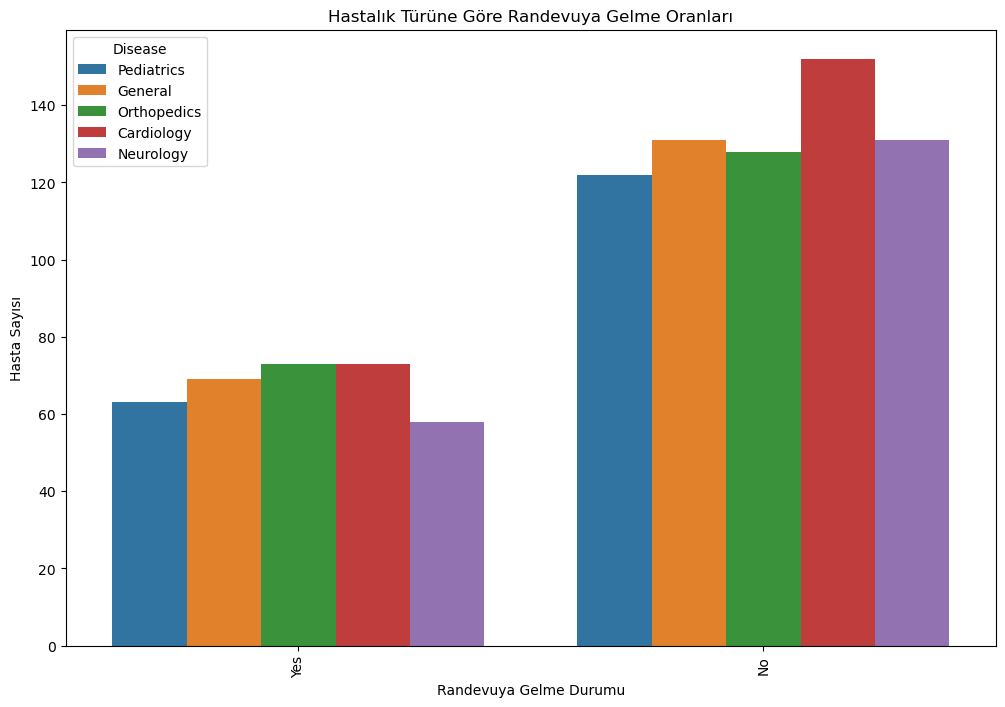

In [28]:
plt.figure(figsize=(12, 8)) # Grafiğin Boyutunu 12x8 İnç Olarak Ayarladık.
sns.countplot(x='NoShow', hue='Disease', data=df) # NoShow Sütununa Göre Disease Ayrımıyla Verilerden Sayım Grafiği Oluşturduk.
plt.title('Hastalık Türüne Göre Randevuya Gelme Oranları') # Grafiğe Başlık Ekledik.
plt.xlabel('Randevuya Gelme Durumu') # X Eksenini Randevuya Gelme Durumu Olarak Gösterdik.
plt.ylabel('Hasta Sayısı') # Y Eksenini Hasta Sayısı Olarak Gösterdik.
plt.xticks(rotation=90) # X Ekseninin Etiketlerini Yatay Olarak Gösterdik.
plt.show() # Grafiği Gösterdik.

Grafiğimiz hastaların hastalık türlerine göre randevuya gelip gelmeme durumlarını gösteriyor.

* "Evet" (Yes) kolonu, randevularına gitmeyen hastaların sayısını gösteriyor. Burada en yüksek değer "Genel" hastalık grubunda görülüyor.

* "Hayır" (No) kolonu ise randevularına gelen hastaların sayısını gösteriyor. Burada özellikle "Ortopediks", "Kardiyoloji" ve "Nöroloji" hasta gruplarının yüksek sayılara sahip olduğu dikkat çekiyor.

* Genel olarak bakıldığında, bazı hastalık gruplarındaki hastalar randevularına daha yüksek oranda katılırken, diğer gruplardaki hastalar randevularına daha sık gelmemektedir.

### Korelasyon Matrisi

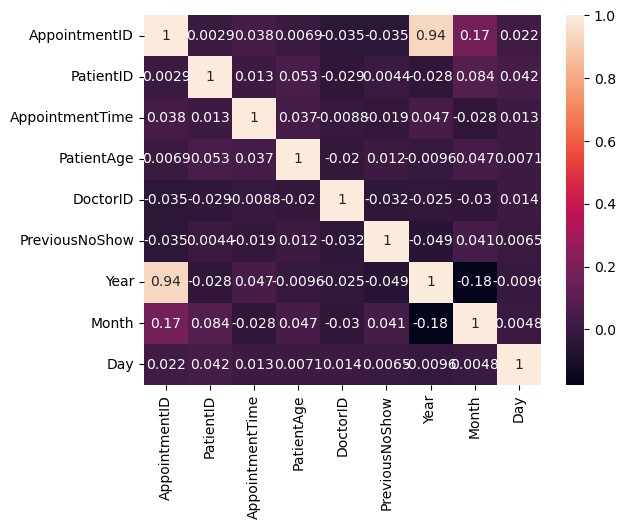

In [29]:
sns.heatmap(df.corr(numeric_only = True), annot = True); # Korelasyon Matrisini Gösterdik.

Genel olarak, koyu renkler pozitif korelasyonu, açık renkler negatif korelasyonu temsil ediyor.

* Grafikteki en güçlü ilişkiler, "AppointmentID", "PatientID", "AppointmentTime" ve "PatientAge" gibi değişkenler arasında görülüyor.

* Randevu ID'si yüksek olan hastaların daha uzun randevu sürelerine sahip olma eğiliminde olduğu anlaşılıyor.

* Daha genç hastaların, önceki randevularına daha sık gelmeme durumunun olduğu da görülüyor.

## 4. Veri Ön İşleme ve Sayısallaştırma


**Kategorik Değişkenlerin Kodlanması**

In [30]:
df.dtypes # Veri Setindeki Değişkenlerin Hangi Türden Verileri Barındırdığını Gördük.

AppointmentID        int64
PatientID            int64
AppointmentTime    float64
AppointmentDay      object
PatientAge           int64
PatientGender       object
Disease             object
DoctorID             int64
PreviousNoShow       int64
SMSReminder         object
NoShow              object
Year                 int32
Month                int32
Day                  int32
dtype: object

In [31]:
df.nunique() # Sütunlardaki Benzersiz Değer Sayılarını Görüntüledik.

AppointmentID      1000
PatientID           615
AppointmentTime      19
AppointmentDay        7
PatientAge          100
PatientGender         2
Disease               5
DoctorID            100
PreviousNoShow        5
SMSReminder           2
NoShow                2
Year                  3
Month                12
Day                  31
dtype: int64

In [32]:
df["PatientGender"] = df["PatientGender"].map({"Male": 0, "Female": 1}) # PatientGender Sütununu Male İçin 0 Female İçin 1 Dönüşümünü Yaptık.

In [33]:
# SMSReminder Sütununu One-Hot Encoding İle Dönüştürdük Ve İlk Kategori Sütununu Sildik.
df= pd.get_dummies(df,columns=["SMSReminder"], drop_first=True)

In [34]:
 # NoShow Sütununu One-Hot Encoding İle Dönüştürdük Ve İlk Kategori Sütununu Sildik.
df= pd.get_dummies(df,columns=["NoShow"], drop_first=True)

In [35]:
df["AppointmentDay"] = LabelEncoder().fit_transform(df["AppointmentDay"]) # AppointmentDay Sütununu LabelEncoder Kullanarak Sayısal Değerlere Dönüştürdük.
df['Disease'] = LabelEncoder().fit_transform(df['Disease']) # Disease Sütununu LabelEncoder Kullanarak Sayısal Değerlere Dönüştürdük.

In [36]:
df.dtypes # Veri Setindeki Değişkenlerin Hangi Türden Verileri Barındırdığını Gördük.

AppointmentID        int64
PatientID            int64
AppointmentTime    float64
AppointmentDay       int32
PatientAge           int64
PatientGender        int64
Disease              int32
DoctorID             int64
PreviousNoShow       int64
Year                 int32
Month                int32
Day                  int32
SMSReminder_Yes       bool
NoShow_Yes            bool
dtype: object

In [37]:
df # Güncel Tabloyu Görüntüledik.

,AppointmentID,PatientID,AppointmentTime,AppointmentDay,PatientAge,PatientGender,Disease,DoctorID,PreviousNoShow,Year,Month,Day,SMSReminder_Yes,NoShow_Yes
0,1,1102,15.0,3,78,0,4,110,3,2023,1,1,True,True
1,2,1435,11.0,1,33,0,1,152,3,2023,1,2,True,False
2,3,1860,9.0,5,35,0,3,145,0,2023,1,3,True,True
3,4,1270,9.0,6,5,1,0,129,1,2023,1,4,True,False
4,5,1106,17.5,4,38,1,4,156,0,2023,1,5,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1009,13.0,1,29,1,3,121,1,2025,9,22,False,True
996,997,1823,10.5,5,23,0,2,110,4,2025,9,23,True,False
997,998,1797,9.5,6,29,1,0,176,2,2025,9,24,False,False
998,999,1241,10.5,4,85,1,1,102,0,2025,9,25,False,False


**Özellik Seçimi**

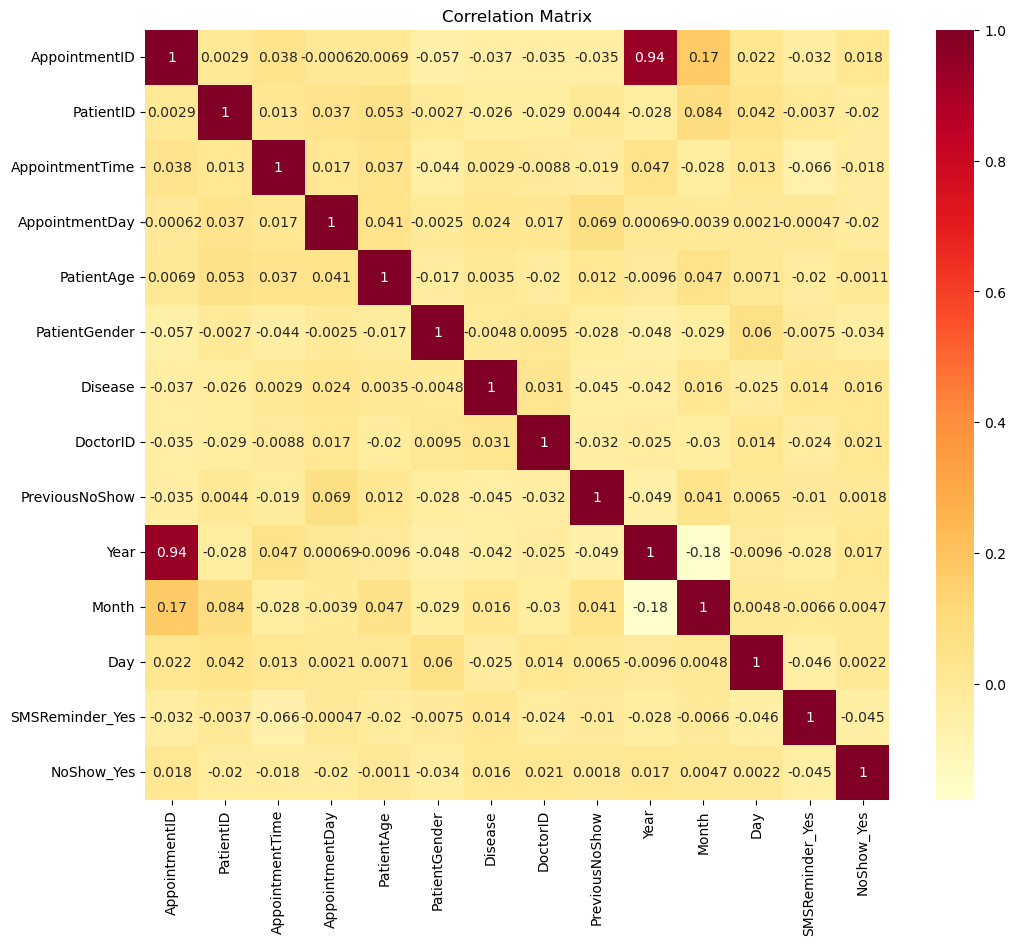

In [38]:
corr_matrix = df.corr() # Korelasyon Matrisini Hesaplama

# Korelasyon Matrisini Görselleştirme
plt.figure(figsize=(12, 10)) # Grafiğin Boyutunu 12x10 İnç Olarak Ayarladık.
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd') # Korelasyon Matrisini Isı Haritası Olarak Gösterdik.
# annot=True İle Hücrelerin Değerlerini Gösterdik.
# cmap='YlOrRd' İfadesi İle Isı Haritası üzerinde Yelow, Orange ve Red Renklerinin Kullanılmasını sağladık.
plt.title('Correlation Matrix') # Grafiğe Başlık Ekledik.
plt.show() # Grafiği Gösterdik.

* AppointmentID ile Year değişkenleri arasında güçlü pozitif bir korelasyona (0.939) sahip. <br>
* NoShow_Yes, diğer özelliklerle zayıf korelasyonlara sahip. En güçlü ilişki, SMSReminder_Yes ile negatif (-0.045) korelasyondur. Bu, SMS hatırlatmaların no-show'ları azaltmada yardımcı olabileceğini gösteriyor.
* PatientAge, PatientGender ve Disease gibi özellikler, hedef değişkenle nispeten düşük korelasyonlara sahip, bu nedenle tahmin gücü sınırlı olabilir.
* PreviousNoShow "Önceki", NoShow_Yes ile küçük pozitif bir korelasyona (0.002) sahip, geçmişteki no-show davranışının gelecekteki no-show'ları tahmin etmede zayıf bir gösterge olabileceğini gösteriyor.

**Model İçin Önemli Olabilcek Özellikler;**
* Tarih özellikleri (Year, Month, Day)
* SMSReminder_Yes "SMS Hatırlatma"
* PreviousNoShow
* Diğer Hasta Özellikleri (PatientAge, PatientGender, Disease)

**Veri Normalizasyonu**

In [39]:
# Sayısal Özelliklerin Normalizasyonu
num_cols = ['AppointmentTime', 'PatientAge', 'DoctorID', 'PreviousNoShow'] # Sayısal Özellikleri Belirledik.
scaler = MinMaxScaler() # Normalizasyon Modeli Oluşturduk.
df[num_cols] = scaler.fit_transform(df[num_cols]) # Sayısal Özellikleri Normalizasyon Modeline Gönderdik.

In [40]:
# Veri kümesini güncelleme
#df = df.drop(['Year', 'Month', 'Day', 'SMSReminder_Yes', 'NoShow_Yes'], axis=1)

In [41]:
df.head() # Veri Setindeki İlk Beş Satırı Görüntüledik.

,AppointmentID,PatientID,AppointmentTime,AppointmentDay,PatientAge,PatientGender,Disease,DoctorID,PreviousNoShow,Year,Month,Day,SMSReminder_Yes,NoShow_Yes
0,1,1102,0.666667,3,0.787879,0,4,0.101010,0.75,2023,1,1,True,True
1,2,1435,0.222222,1,0.333333,0,1,0.525253,0.75,2023,1,2,True,False
2,3,1860,0.000000,5,0.353535,0,3,0.454545,0.00,2023,1,3,True,True
3,4,1270,0.000000,6,0.050505,1,0,0.292929,0.25,2023,1,4,True,False
4,5,1106,0.944444,4,0.383838,1,4,0.565657,0.00,2023,1,5,True,True


## 5. Model Oluşturma ve Değerlendirme

**Veri Setinin Bölünmesi**

In [42]:
# Veri Setini Bölme
X = df.drop('Disease', axis=1)  # Bağımsız Değişkenler.
y = df['Disease']  # Hedef Değişken.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Veri Setini Eğitim ve Test Olarak Böldük. Setin %20 sini Teste Verdik. Veri Setinin Bölünmesinin Her Seferinde Aynı Olmasını Sağladık.

**Model Seçimi ve Model Eğitimi**

In [43]:
# Logistic Regresyon Modeli
lr_model = LogisticRegression()

In [44]:
# Modeli Eğittik.
lr_model.fit(X_train, y_train)

LogisticRegression()

In [45]:
# Model Üzerinde Eğitim Sonrası Test Veri Seti Üzerinde Tahminleme Yaptık.
y_pred = lr_model.predict(X_test)

**Model Değerlendirmesi**

In [46]:
# Model Değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk: {accuracy:.2f}")

Doğruluk: 0.23


In [47]:
precision = precision_score(y_test, y_pred, average='macro') # Makro Ortalama Kullanarak y_test ve y_pred Arasındaki Hassasiyet Skorunu Hesapladık.
recall = recall_score(y_test, y_pred, average='macro') # Makro Ortalama Kullanarak y_test ve y_pred Arasındaki Geri Çağırma Skorunu Hesapladık.

print(f"Hassasiyet: {precision:.2f}")
print(f"Geri Çağırma: {recall:.2f}")

Hassasiyet: 0.16
Geri Çağırma: 0.22


In [48]:
# Karışıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred) # y_test ve y_pred Arasındaki Karışıklık Matrisini Hesapladık.
print("Confusion Matrix:\n", conf_matrix) # Karışıklık Matrisini Gösterdik.

Confusion Matrix:
 [[27  4  2  9  1]
 [17 11  1  9  0]
 [19  8  1 11  0]
 [23 11  3  7  0]
 [20  6  3  7  0]]


In [49]:
classification_rep = classification_report(y_test, y_pred) # y_test ve y_pred Arasındaki Sınıflandırma Raporunu Oluşturduk.
print("Classification Report:\n", classification_rep) # Sınıflandırma Raporunu Gösterdik.

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.63      0.36        43
           1       0.28      0.29      0.28        38
           2       0.10      0.03      0.04        39
           3       0.16      0.16      0.16        44
           4       0.00      0.00      0.00        36

    accuracy                           0.23       200
   macro avg       0.16      0.22      0.17       200
weighted avg       0.16      0.23      0.17       200



In [50]:
# Karar Ağacı Modeli
dt_model = DecisionTreeClassifier() # Karar Ağacı Modelini Oluşturduk.


In [51]:
# Modeli Eğitimi
dt_model.fit(X_train, y_train) # Eğitip Modeli Eğittik.

DecisionTreeClassifier()

In [52]:
y_pred_dt = dt_model.predict(X_test) # Test Veri Setinin Üzerinde Tahminleme Yaptık.

In [53]:
# Model Değerlendirme
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Doğruluk: {accuracy:.2f}")

Doğruluk: 0.18


In [54]:
precision = precision_score(y_test, y_pred_dt, average='macro')
recall = recall_score(y_test, y_pred_dt, average='macro')

print(f"Kesinlik: {precision:.2f}")
print(f"Geri Çağırma: {recall:.2f}")

Kesinlik: 0.18
Geri Çağırma: 0.18


In [55]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 8  9 10 12  4]
 [ 8  8  8  6  8]
 [ 9  6  7  9  8]
 [13  4  5 10 12]
 [10  5 10  8  3]]


In [56]:
classification_rep = classification_report(y_test, y_pred_dt)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.19      0.18        43
           1       0.25      0.21      0.23        38
           2       0.17      0.18      0.18        39
           3       0.22      0.23      0.22        44
           4       0.09      0.08      0.08        36

    accuracy                           0.18       200
   macro avg       0.18      0.18      0.18       200
weighted avg       0.18      0.18      0.18       200



In [57]:
# Random Forest Modeli
rf_model = RandomForestClassifier() # Random Forest Modelini Oluşturduk.


In [58]:

rf_model.fit(X_train, y_train) # Modeli Eğittik.


RandomForestClassifier()

In [59]:
y_pred_rf = rf_model.predict(X_test) # Test Veri Setinin Üzerinde Tahminleme Yaptık.

In [60]:
# Model Değerlendirme
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Doğruluk: {accuracy:.2f}")

Doğruluk: 0.18


In [61]:
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')

print(f"Kesinlik: {precision:.2f}")
print(f"Geri Çağırma: {recall:.2f}")

Kesinlik: 0.18
Geri Çağırma: 0.18


In [62]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[12  7  7 10  7]
 [13  8  8  3  6]
 [11  8  5  9  6]
 [15  7  8  8  6]
 [13  6  9  4  4]]


In [63]:
classification_rep = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.28      0.22        43
           1       0.22      0.21      0.22        38
           2       0.14      0.13      0.13        39
           3       0.24      0.18      0.21        44
           4       0.14      0.11      0.12        36

    accuracy                           0.18       200
   macro avg       0.18      0.18      0.18       200
weighted avg       0.19      0.18      0.18       200



**Modelleri Değerlendirmeleri**
* Logistic Regression Modeli:<br>
Doğruluk: 0.23<br>
Hassasiyet: 0.16<br>
Geri Çağırma: 0.22<br>
Logistic Regression modeli, bu veri seti için en iyi sonuçları elde etmiştir ancak yine de oldukça düşük bir doğruluk oranına sahiptir.<br>
* Karar Ağacı Modeli:<br>
Doğruluk: 0.18<br>
Kesinlik: 0.18<br>
Geri Çağırma: 0.18<br>
Karar Ağacı modeli, Logistic Regression'a göre daha düşük performans göstermiştir.<br>
* Random Forest Modeli:<br>
Doğruluk: 0.18<br>
Kesinlik: 0.18<br>
Geri Çağırma: 0.18<br>
Random Forest modeli, diğer iki modele kıyasla en düşük performansı sergilemiştir.<br>